<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/PROCESA_VIDEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!pip install opencv_jupyter_ui
!pip install -q ipycanvas==0.11
from google.colab import output
output.enable_custom_widget_manager()
!pip install easyocr



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.7/255.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.3 MB/s eta 0:00:00


In [9]:
import cv2
from matplotlib import pyplot as plt
import opencv_jupyter_ui as jcv2

from tracker import *



In [3]:
from google.colab import files
uploadfile=files.upload()




Saving guepardos_trimmed.mp4 to guepardos_trimmed (1).mp4


In [4]:
# Importación de la biblioteca OpenCV
import cv2
# Leer la imagen usando la función imread()
#image = cv2.imread("highway.jpg")
#jcv2.imshow("Mario",image)
# Extraer la altura y la anchura de una imagen
#h, w = image.shape[:2]
# Mostrar la altura y la anchura
#print("Altura = {}, Anchura = {}".format(h, w))
#también funciona
#print(image.shape)

#backeraser=cv2.createBackgroundSubtractorMOG2(history=50, varThreshold=100);



#jcv2.imshow("Mask", mask);


In [17]:
cap = cv2.VideoCapture("guepardos_trimmed (1).mp4")

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")

# Create tracker object
tracker = EuclideanDistTracker()

backeraser=cv2.createBackgroundSubtractorMOG2()#(history=100, varThreshold=40);
# Read until video is completed
while(cap.isOpened()):

# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
   #Show the image with matplotlib

        mask=backeraser.apply(frame);
        #plt.imshow(frame)
        #plt.show()
        # Extract Region of interest
        #roi = frame[340: 720,500: 800]


        _, mask = cv2.threshold(mask, 254, 255, cv2.THRESH_BINARY);
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        detections = []
        for cnt in contours:
          # Calculate area and remove small elements
          area = cv2.contourArea(cnt)
          if area > 100:
              cv2.drawContours(frame, [cnt], -1, (0, 255, 0), 2)
              x, y, w, h = cv2.boundingRect(cnt);
              detections.append([x, y, w, h]);

              # 2. Object Tracking
          boxes_ids = tracker.update(detections)
          for box_id in boxes_ids:
            x, y, w, h, id = box_id;
            cv2.putText(frame, str(id), (x, y - 15), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)








        # Press Q on keyboard to exit

        jcv2.imshow("Frame",frame)
    if jcv2.waitKey(25) & 0xFF == ord('q'):
      break



# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
jcv2.destroyAllWindows()

Se han truncado las últimas 5000 líneas del flujo de salida.
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 264)}
{12: (37, 2

KeyboardInterrupt: ignored

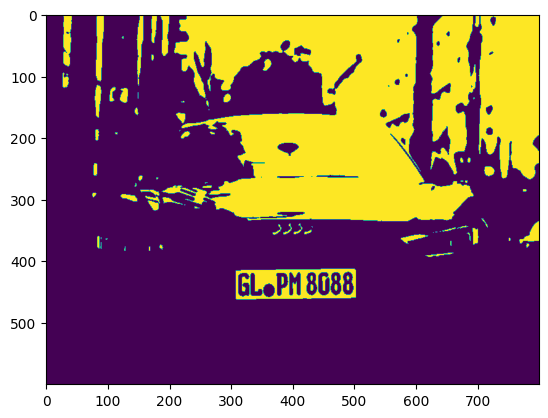

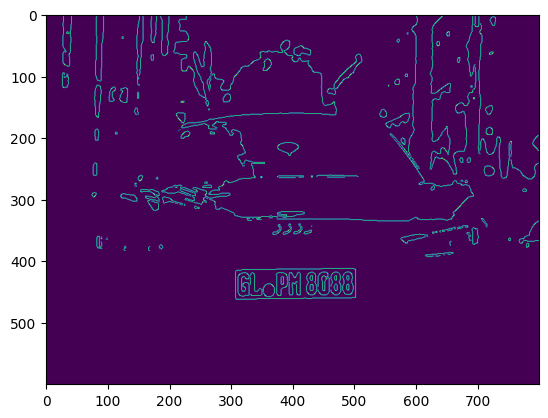

GL


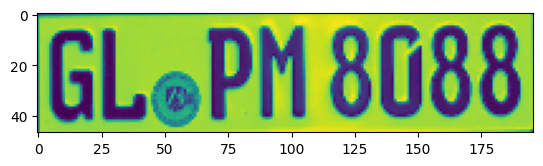

In [ ]:
import cv2
import easyocr
import numpy as np

img = cv2.imread('car.jpg')
img = cv2.resize(img, (800, 600))

# Preprocess - To separate out regions


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
ret,thresh1 = cv2.threshold(blur,150,255,cv2.THRESH_BINARY)

plt.imshow( thresh1)
plt.show()

edged = cv2.Canny(thresh1, 10, 200)
plt.imshow( edged)
plt.show()

# find the contours, sort them, and keep only the 5 largest ones
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

# loop over the contours
for c in contours:
    # approximate each contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if the contour has 4 points, we can say
    # that we have found our license plate
    if len(approx) == 4:
        n_plate_cnt = approx
        break

# get the bounding box of the contour and
# extract the license plate from the image
(x, y, w, h) = cv2.boundingRect(n_plate_cnt)
license_plate = gray[y:y + h, x:x + w]

plt.imshow(license_plate)

# Use easyocr to extract text
reader = easyocr.Reader(['en'])
result = reader.readtext(license_plate)
text = result[0][-2]

print(text)


